In [1]:
#non-SQLAlchemy packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cbook as cbook
import matplotlib.dates as mdates

# SQLAlchemy
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine


### Understand Hawaii SQLite Database

In [2]:
# Create engine using the `demographics.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [4]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [5]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [6]:
# Query All Records in the measurement Database
query = "SELECT * FROM measurement;"
conn=engine.connect()
measurement= pd.read_sql(query, conn)
measurement.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [7]:
measurement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       19550 non-null  int64  
 1   station  19550 non-null  object 
 2   date     19550 non-null  object 
 3   prcp     18103 non-null  float64
 4   tobs     19550 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 763.8+ KB


In [8]:
# Query All Records in the station Database
query = "SELECT * FROM station;"
conn=engine.connect()
station= pd.read_sql(query, conn)
station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [9]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         9 non-null      int64  
 1   station    9 non-null      object 
 2   name       9 non-null      object 
 3   latitude   9 non-null      float64
 4   longitude  9 non-null      float64
 5   elevation  9 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 560.0+ bytes


### Precipitation Analysis

In [10]:
#most recent date in data set
query = """SELECT
                max(date) as Most_Recent
            FROM 
                measurement;"""
conn=engine.connect()
date_df= pd.read_sql(query, conn)
date_df

,Most_Recent
0,2017-08-23


In [11]:
#last 12 months of data set
query = """SELECT
                date, prcp
            FROM 
                measurement
            WHERE
                date >= '2016-08-23';"""
conn=engine.connect()
lastYear= pd.read_sql(query, conn)
lastYear

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [12]:
#make date into datetime
lastYear['date'] = pd.to_datetime(lastYear['date'])
lastYear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2230 non-null   datetime64[ns]
 1   prcp    2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.0 KB


In [13]:
#sort dates and reset index
lastYear = lastYear.sort_values(by='date').reset_index()
lastYear

,index,date,prcp
0,0,2016-08-23,0.00
1,1009,2016-08-23,NaN
2,1529,2016-08-23,1.79
3,704,2016-08-23,0.05
4,361,2016-08-23,0.15
...,...,...,...
2225,1527,2017-08-22,0.00
2226,1008,2017-08-23,0.00
2227,360,2017-08-23,0.00
2228,1528,2017-08-23,0.08


In [14]:
#set data as index
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
lastYear.set_index(['date'])

,index,prcp
date,,
2016-08-23,0,0.00
2016-08-23,1009,NaN
2016-08-23,1529,1.79
2016-08-23,704,0.05
2016-08-23,361,0.15
...,...,...
2017-08-22,1527,0.00
2017-08-23,1008,0.00
2017-08-23,360,0.00


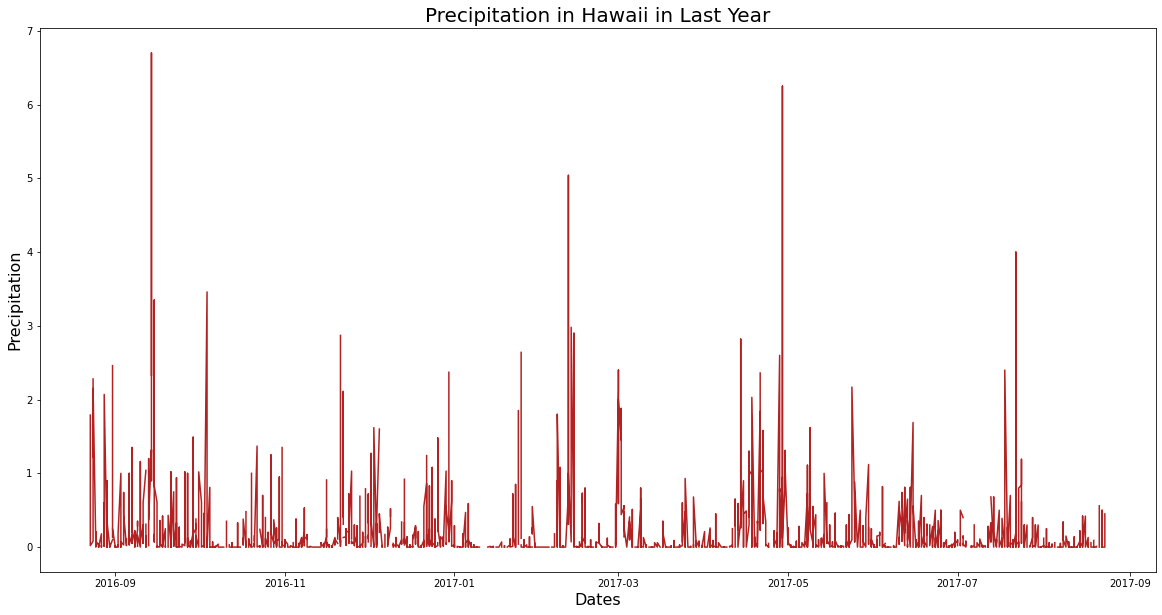

In [15]:
plt.figure(figsize=(20,10))

#plot
x= lastYear.date
y= lastYear.prcp

plt.plot(x,y, color="firebrick")

#titles
plt.xlabel("Dates", fontsize=16)
plt.ylabel("Precipitation", fontsize=16)
plt.title("Precipitation in Hawaii in Last Year", fontsize=20)


plt.show()

### Station Analysis

In [17]:
# Query the total number of stations in the dataset
query = """
        SELECT 
            count(station) as countStations
        FROM measurement;
"""
conn=engine.connect()
countStations= pd.read_sql(query, conn)
countStations.head()

,countStations
0,19550


In [18]:
# Query the total number of stations in the dataset
query = """
        SELECT 
            count(DISTINCT station) as totalStations
        FROM measurement;
"""
conn=engine.connect()
totalStations= pd.read_sql(query, conn)
totalStations.head()

,totalStations
0,9


In [19]:
#find most active stations
query = """
        SELECT
            station,
            count(station) as stationCount
        FROM 
            measurement
        GROUP BY
            station
        ORDER BY
            stationCount DESC;
"""
conn=engine.connect()
stationCount= pd.read_sql(query, conn)
stationCount.head()

,station,stationCount
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [20]:
#which station had the highest number of observations?
#https://stackoverflow.com/questions/2436820/can-i-do-a-maxcount-in-sql
query = """
        SELECT
            station,
            count(station) as stationCount
        FROM 
            measurement
        GROUP BY
            station
        ORDER BY
            stationCount DESC limit 1;
"""
conn=engine.connect()
maxCount= pd.read_sql(query, conn)
maxCount.head()

,station,stationCount
0,USC00519281,2772


In [21]:
#calculate the lowest, highest, and average temperature of most active station ID
query = """
        SELECT
            station,
            min(tobs),
            max(tobs),
            avg(tobs)
        FROM 
            measurement
        WHERE
            station = 'USC00519281';
"""
conn=engine.connect()
activeStation= pd.read_sql(query, conn)
activeStation

,station,min(tobs),max(tobs),avg(tobs)
0,USC00519281,54.0,85.0,71.663781


In [22]:
#last twelve months of temperature observation data (general query)
query = """SELECT
                *
            FROM 
                measurement
            WHERE
                date >= '2016-08-23';"""
conn=engine.connect()
lastYearTemp= pd.read_sql(query, conn)
lastYearTemp

,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,2365,USC00519397,2016-08-24,0.08,79.0
2,2366,USC00519397,2016-08-25,0.08,80.0
3,2367,USC00519397,2016-08-26,0.00,79.0
4,2368,USC00519397,2016-08-27,0.00,77.0
...,...,...,...,...,...
2225,19546,USC00516128,2017-08-19,0.09,71.0
2226,19547,USC00516128,2017-08-20,NaN,78.0
2227,19548,USC00516128,2017-08-21,0.56,76.0
2228,19549,USC00516128,2017-08-22,0.50,76.0


In [23]:
#last twelve months of temperature observation data for most active station
query = """SELECT
                station,
                date,
                tobs
            FROM 
                measurement
            WHERE
                date >= '2016-08-23'
            AND
                station = 'USC00519281';"""
conn=engine.connect()
tempActive= pd.read_sql(query, conn)
tempActive

,station,date,tobs
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0
...,...,...,...
347,USC00519281,2017-08-14,77.0
348,USC00519281,2017-08-15,77.0
349,USC00519281,2017-08-16,76.0
350,USC00519281,2017-08-17,76.0


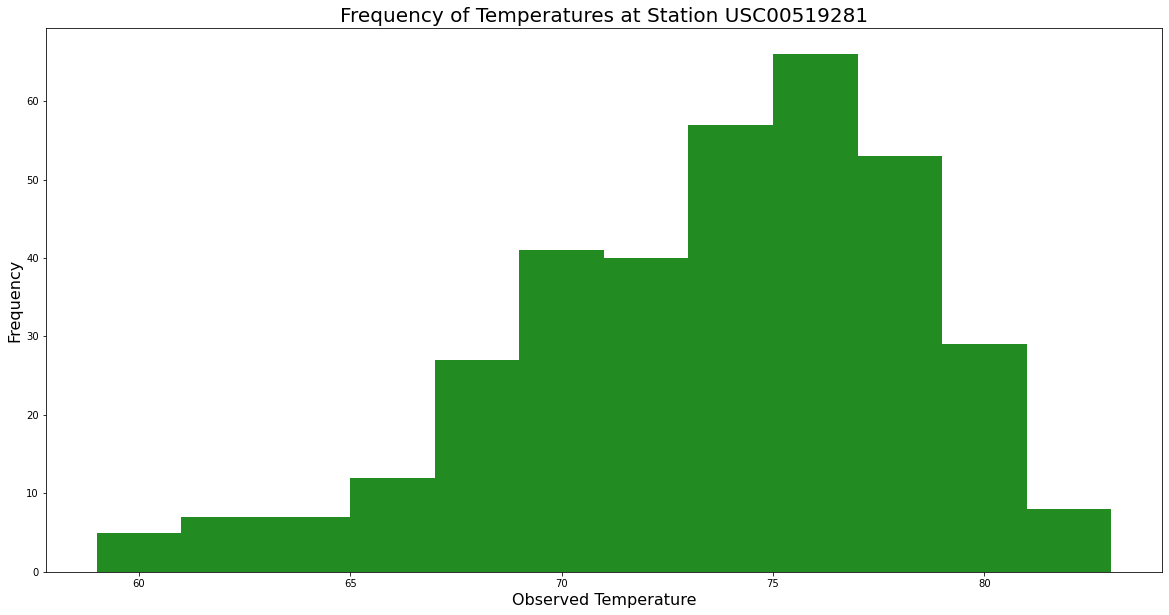

In [24]:
plt.figure(figsize=(20,10))

#plot
plt.hist(tempActive.tobs, bins=12, color='forestgreen')

#titles
plt.xlabel("Observed Temperature", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Frequency of Temperatures at Station USC00519281", fontsize=20)

plt.show()

In [25]:
conn.close()
engine.dispose()

Resources
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
https://stackoverflow.com/questions/2436820/can-i-do-a-maxcount-in-sql